https://es.wikipedia.org/wiki/Histograma

https://matplotlib.org/stable/gallery/statistics/hist.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Graficos emergente:
# %matplotlib qt5

# Utilizamos el equivalente:
%matplotlib inline

Cargamos los datos de insurance.csv

In [ ]:
# para google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path = "../datos/"

path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/"
datos = pd.read_csv(path + "insurance.csv", sep = ",")
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
datos.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Creamos un histograma con los valores por defecto

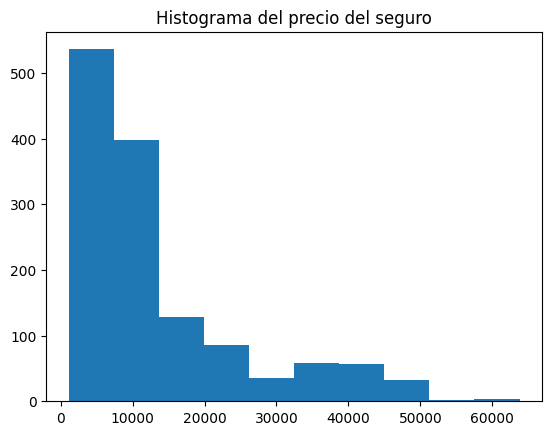

In [ ]:
fig, ax = plt.subplots()

ax.hist(datos.charges)

ax.set_title("Histograma del precio del seguro")

plt.show()

Las categorías se pueden especificar con bins, ya sea el número, los rangos que se quieran o un método para calcularlas

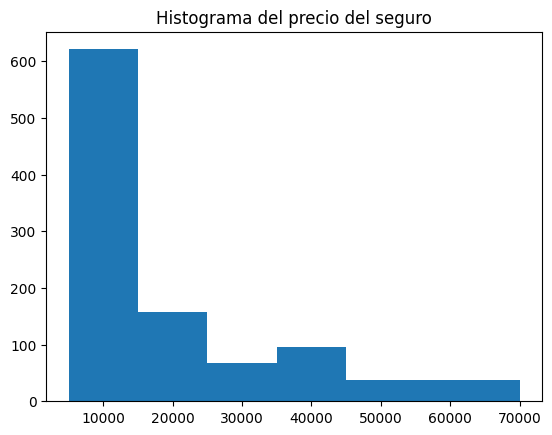

In [ ]:
fig, ax = plt.subplots()

# Aqui hay 5 barras: 5000-15000 (10000)
ax.hist(datos.charges, bins = [5000, 15000, 25000, 35000, 45000, 70000])

ax.set_title("Histograma del precio del seguro")

plt.show()

Para un histogramama acumulativo, se usa cumulative = True

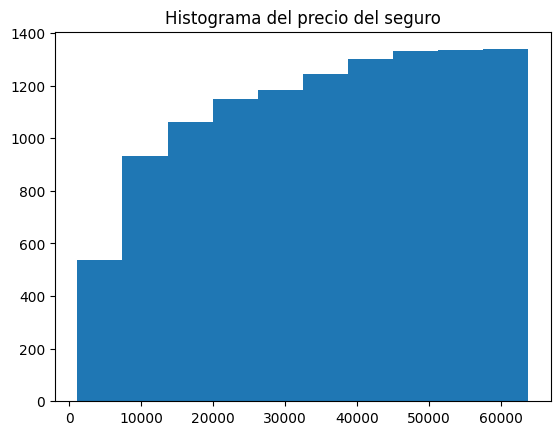

In [ ]:
fig, ax = plt.subplots()

ax.hist(datos.charges, cumulative = True)

ax.set_title("Histograma del precio del seguro")

plt.show()

Para un histograma de frecuencias relativas, density = True. Hay que tener cuidado con lo que devuelve, la frecuencia está normalizada usando el ancho de los bins

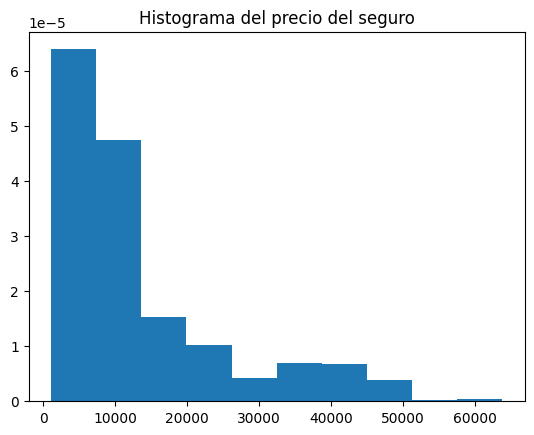

In [ ]:
fig, ax = plt.subplots()

r = ax.hist(datos.charges, density = True)

ax.set_title("Histograma del precio del seguro")

plt.show()
# 1e-5: (1*10^-5): afecta a todo el eje y

In [ ]:
r

(array([6.39436796e-05, 4.74805681e-05, 1.53894304e-05, 1.02596202e-05,
        4.17542684e-06, 7.03857668e-06, 6.79998086e-06, 3.81753311e-06,
        2.38595820e-07, 4.77191639e-07]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

Para que la probabilidad se vea mejor, es más práctico usar el argumento weights

In [ ]:
# Multiplicar una serie [2] * 4 (numero) = [2 2 2 2]
weights= [1. / len(datos)] * len(datos)
weights[0:5]

[0.0007473841554559044,
 0.0007473841554559044,
 0.0007473841554559044,
 0.0007473841554559044,
 0.0007473841554559044]

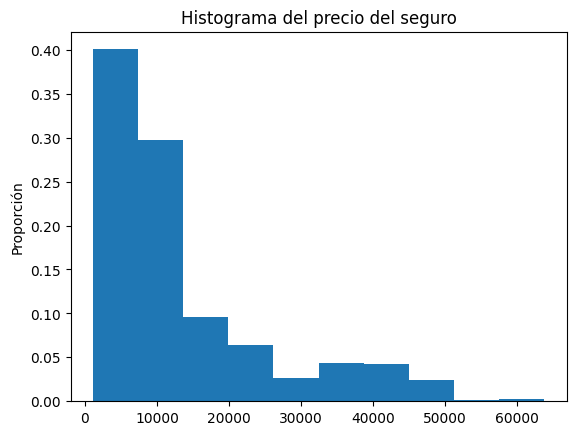

In [ ]:
fig, ax = plt.subplots()

r = ax.hist(datos.charges,  weights= [1. / len(datos)] * len(datos))
# Multiplicar una serie [2] * 4 (numero) = [2 2 2 2]

ax.set_title("Histograma del precio del seguro")
ax.set_ylabel("Proporción")

plt.show()

Podemos pasar varias series de datos, la forma en la que se muestren depende de los argumentos histtype y stacked (apilados). Los valores por defecto son 'bar' y False, y se muestran las barras una junta a otra.

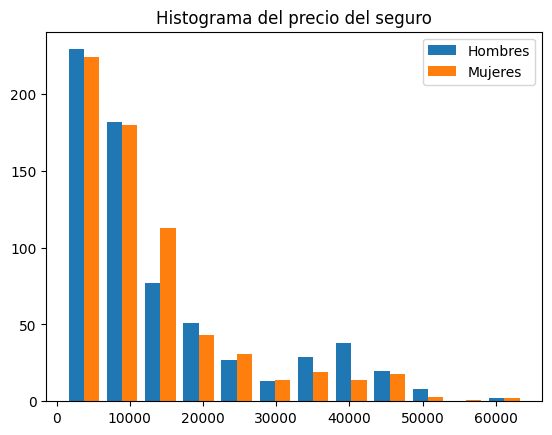

In [ ]:
hombres = datos[datos.sex == "male"]
mujeres = datos[datos.sex == "female"]

fig, ax = plt.subplots()
ax.hist([hombres.charges, mujeres.charges], bins = 'sturges', label = ["Hombres", "Mujeres"])

ax.set_title("Histograma del precio del seguro")
ax.legend()

plt.show()

Probamos con stacked

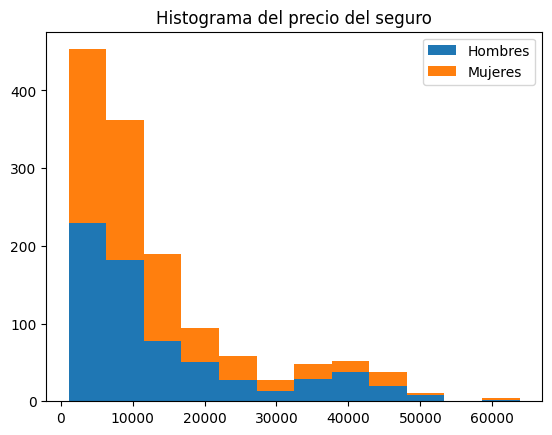

In [ ]:
hombres = datos[datos.sex == "male"]
mujeres = datos[datos.sex == "female"]

fig, ax = plt.subplots()

ax.hist([hombres.charges, mujeres.charges], bins = 'sturges', label = ["Hombres", "Mujeres"], stacked = True)

ax.set_title("Histograma del precio del seguro")
ax.legend()

# stacked: uno encima del otro
plt.show()

Probamos con  histtype = 'step'

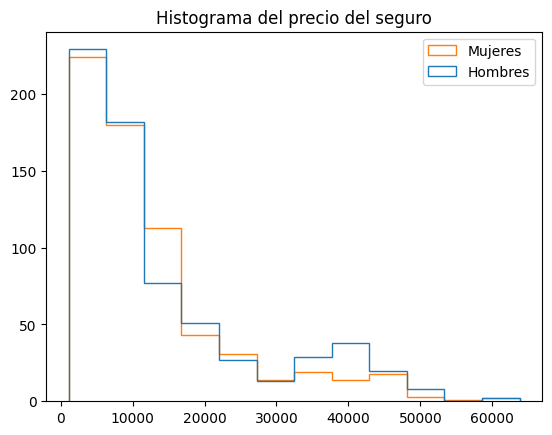

In [ ]:
hombres = datos[datos.sex == "male"]
mujeres = datos[datos.sex == "female"]

fig, ax = plt.subplots()

ax.hist([hombres.charges, mujeres.charges], bins = 'sturges', label = ["Hombres", "Mujeres"], histtype = 'step')

ax.set_title("Histograma del precio del seguro")
ax.legend()

plt.show()

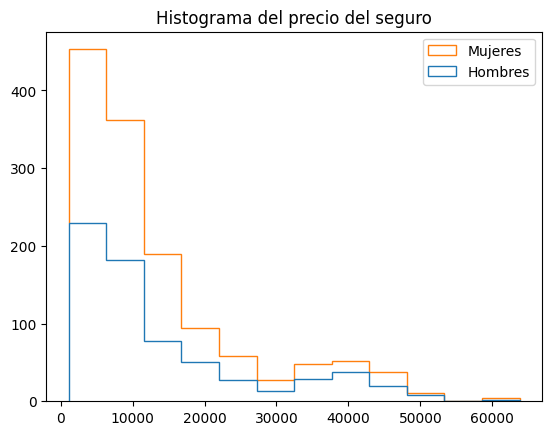

In [ ]:
hombres = datos[datos.sex == "male"]
mujeres = datos[datos.sex == "female"]

fig, ax = plt.subplots()

ax.hist([hombres.charges, mujeres.charges], bins = 'sturges', label = ["Hombres", "Mujeres"], histtype = 'step', stacked = True)

ax.set_title("Histograma del precio del seguro")
ax.legend()

plt.show()